In [31]:
import pandas as pd
import texthero as hero
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from texthero import preprocessing
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [32]:
# Read the XLSX file
data= pd.read_csv("../data/Emotion_final.csv")

In [33]:
data

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


In [34]:
# Étudier la répartition des textes par émotions
hero.scatterplot(data, 'Text', color='Emotion')

In [35]:
#Identifier les mots susceptibles d'être des stopwords
#data['clean_text'] = hero.remove_stopwords(data['Text'])

In [36]:
# Prétraitement des données
custom_pipeline = [
    preprocessing.fillna,
    preprocessing.lowercase,
    preprocessing.remove_digits,
    preprocessing.remove_punctuation,
    preprocessing.remove_diacritics,
    preprocessing.remove_whitespace,
    preprocessing.remove_stopwords
]
# data['clean_text'] = hero.clean(data['text'], pipeline=[preprocessing.remove_digits, preprocessing.remove_punctuation, 
#                                                         preprocessing.remove_diacritics, preprocessing.remove_whitespace, preprocessing.remove_urls, 
#                                                         preprocessing.remove_brackets, preprocessing.remove_angle_brackets, preprocessing.remove_square_brackets, 
#                                                         preprocessing.remove_curly_brackets, preprocessing.remove_parentheses, preprocessing.remove_stopwords(stopwords), preprocessing.lowercase])

data['clean_text'] = hero.clean(data['Text'], pipeline=custom_pipeline)



In [37]:
data['clean_text'].head(11)

0                                 didnt feel humiliated
1       go  feeling  hopeless   damned hopeful    ar...
2          im grabbing  minute  post  feel greedy wrong
3       ever feeling nostalgic   fireplace   know   ...
4                                       feeling grouchy
5     ive  feeling  little burdened lately wasnt sur...
6     ive  taking  milligrams  times recommended amo...
7      feel  confused  life   teenager   jaded   yea...
8         petronas  years  feel  petronas  performed...
9                                        feel romantic 
10     feel like    make  suffering   seeing mean so...
Name: clean_text, dtype: object

In [38]:
# Étudier la répartition des textes par émotions
hero.scatterplot(data, 'clean_text', color='Emotion')

In [60]:
# Extraction des mots les plus courants pour chaque sentiment
common_words_per_emotion = {}
for emotion in data['Emotion'].unique():
    mask = data['Emotion'] == emotion
    text = data[mask]['clean_text']
    words = ' '.join(text).split()
    word_freq = FreqDist(words)
    top_words = [word for word, freq in word_freq.most_common(40) if word not in stopwords.words('english')]
    common_words_per_emotion[emotion] = top_words

In [61]:
# Affichage des 30 mots les plus courants pour chaque sentiment
for emotion, words in common_words_per_emotion.items():
    print(f"Emotion: {emotion}")
    print(words)
    print()

Emotion: sadness
['feel', 'feeling', 'like', 'im', 'really', 'know', 'get', 'would', 'time', 'little', 'ive', 'still', 'even', 'want', 'one', 'life', 'people', 'think', 'bit', 'things', 'much', 'dont', 'make', 'day', 'something', 'back', 'going', 'way', 'could', 'pretty', 'right', 'always', 'go', 'love', 'felt', 'cant', 'sad', 'feelings', 'alone', 'bad']

Emotion: anger
['feel', 'feeling', 'like', 'im', 'really', 'get', 'people', 'know', 'time', 'little', 'want', 'even', 'would', 'angry', 'think', 'one', 'could', 'things', 'bit', 'way', 'offended', 'dont', 'resentful', 'cold', 'still', 'something', 'irritable', 'cant', 'going', 'bothered', 'ive', 'back', 'greedy', 'life', 'mad', 'insulted', 'irritated', 'need', 'pissed', 'violent']

Emotion: love
['feel', 'feeling', 'like', 'im', 'love', 'really', 'know', 'sweet', 'loving', 'time', 'want', 'people', 'caring', 'passionate', 'one', 'sympathetic', 'life', 'liked', 'get', 'hot', 'little', 'feelings', 'tender', 'lovely', 'longing', 'loved',

In [64]:
# Compter les occurrences de chaque mot pour chaque émotion
common_words_per_emotion = {}
for emotion, group in grouped_tokens:
    word_counts = group.value_counts()
    common_words_per_emotion[emotion] = word_counts.head(30)

# Affichage des résultats
for emotion, words in common_words_per_emotion.items():
    print(f"Emotion: {emotion}")
    print(words)
    print()

Emotion: anger
tokens     emotion
feel       anger      201
feeling    anger       86
like       anger       66
im         anger       53
time       anger       22
little     anger       21
bit        anger       21
love       anger       17
get        anger       17
would      anger       17
want       anger       17
really     anger       16
even       anger       16
something  anger       15
still      anger       15
also       anger       14
could      anger       13
think      anger       13
right      anger       12
know       anger       12
people     anger       12
one        anger       11
life       anger       11
didnt      anger       10
ive        anger       10
make       anger        9
better     anger        9
find       anger        9
going      anger        9
day        anger        8
Name: count, dtype: int64

Emotion: fear
tokens     emotion
feel       fear       200
feeling    fear        83
like       fear        49
im         fear        31
really     fear       

In [71]:
# Création du DataFrame à partir des résultats
data = {
    'Emotion': [],
    'Token': [],
    'Count': []
}

for emotion, words in common_words_per_emotion.items():
    for token, count in words.items():
        data['Emotion'].append(emotion)
        data['Token'].append(token)
        data['Count'].append(count)

df = pd.DataFrame(data)


In [76]:
df.tail(20)

,Emotion,Token,Count
160,surprise,"(always, surprise)",5
161,surprise,"(much, surprise)",5
162,surprise,"(know, surprise)",5
163,surprise,"(time, surprise)",4
164,surprise,"(think, surprise)",4
165,surprise,"(quite, surprise)",4
166,surprise,"(one, surprise)",4
167,surprise,"(however, surprise)",4
168,surprise,"(lonely, surprise)",4
169,surprise,"(love, surprise)",4


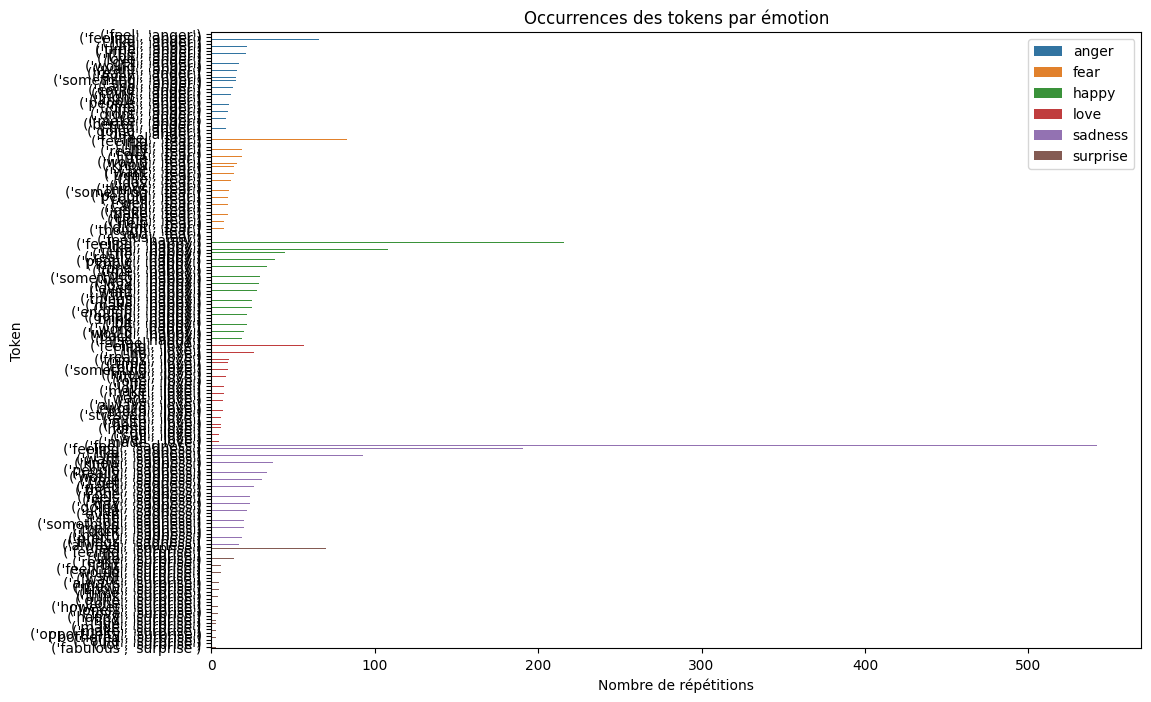

In [77]:
# Affichage du diagramme à barres empilées
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Count', y='Token', hue='Emotion')
plt.xlabel('Nombre de répétitions')
plt.ylabel('Token')
plt.title('Occurrences des tokens par émotion')
plt.legend()
plt.show()

In [42]:
# Vectorisation des mots
tfidf = hero.TfidfVectorizer()
vectorized = tfidf.fit_transform(data['clean_text'])

In [43]:
# Réduction de dimension (TruncatedSVD)
svd = TruncatedSVD(n_components=2)
svd_components = svd.fit_transform(vectorized)

In [44]:
# Attribution de valeurs numériques uniques à chaque émotion
data['emotion_code'] = pd.factorize(data['Emotion'])[0]